In [5]:
#https://www.kaggle.com/manasgarg/iplimport seaborn as sns

import pandas as pd
import numpy as np
import os

In [16]:
#from IPython.display import HTML
#bowler strike rate=balls_bowled/Wickets_Taken
#bowler economy rate=runs_conceeded/overs_bowled

In [3]:
from IPython.display import Image

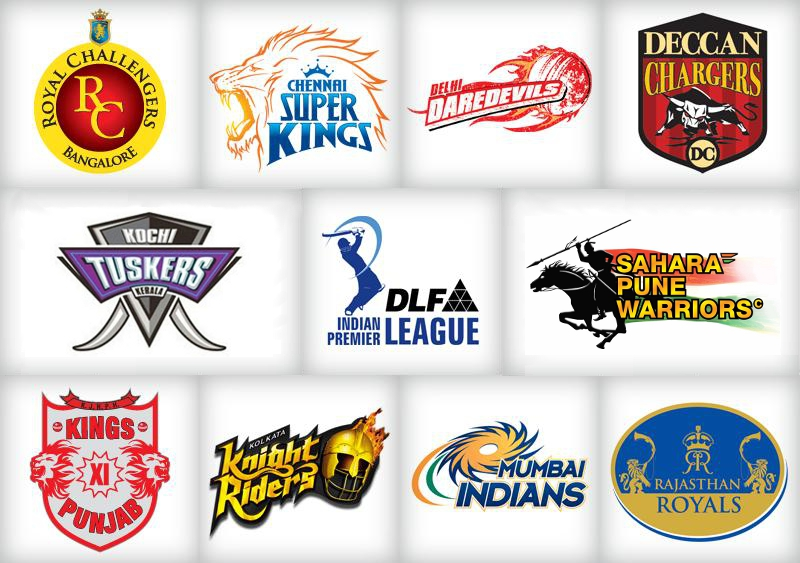

In [4]:
Image(r'C:\Users\yashv\Desktop\SEM 2\Python programming\logo.jpeg',
height = 800, width = 600)

In [6]:
a1=pd.read_csv('/Users/jegaveerpandianrajendran/Desktop/deliveries.csv')

In [6]:
pd.set_option('display.min_rows', 500)

In [7]:
a1.replace("Rising Pune Supergiants", 
           "Pune Warriors", 
           inplace=True)

In [8]:
a1.replace("Rising Pune Supergiant", 
           "Pune Warriors", 
           inplace=True)

In [9]:
a1.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Pune Warriors', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [10]:
is_super_over = {1 : 'yes',0 : 'no'}

In [11]:
a1.is_super_over = [is_super_over[item] for item in a1.is_super_over]

In [12]:
a1.is_super_over.unique()

array(['no', 'yes'], dtype=object)

In [13]:
a1.groupby('batting_team')['batting_team'].count()

batting_team
Chennai Super Kings            15754
Deccan Chargers                 9034
Delhi Daredevils               17185
Gujarat Lions                   3566
Kings XI Punjab                17594
Kochi Tuskers Kerala            1582
Kolkata Knight Riders          17229
Mumbai Indians                 18943
Pune Warriors                   8923
Rajasthan Royals               13914
Royal Challengers Bangalore    17678
Sunrisers Hyderabad             9058
Name: batting_team, dtype: int64

# TOTAL NUMBER OF TEAMS

In [14]:
a1.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Pune Warriors', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Gujarat Lions', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [15]:
a1.loc[a1['ball']>=7,'Wide/No_ball'] ='Yes' 

In [16]:
a1.loc[a1['ball']<=6,'Wide/No_ball'] ='No' 

# TOTAL NUMBER OF BOWLERS IN SEASON

In [17]:
a1bowlers=a1['bowler'].drop_duplicates(keep='first')

In [18]:
a1bowlers.shape

(356,)

In [19]:
a1['ball'].shape

(150460,)

In [20]:
a1['player_dismissed']=a1['player_dismissed'].fillna(0)

In [21]:
a1['dismissal_kind']=a1['dismissal_kind'].fillna(0)

In [9]:
a1main = a1.loc[:,['bowler','player_dismissed','dismissal_kind','is_super_over','extra_runs','total_runs']]

# BOWLERS WHO BOWLED SUPER OVER

In [23]:
bowled_superover=a1main.loc[a1main['is_super_over']=='yes'].groupby('bowler')['is_super_over'].count()

In [24]:
bowled_superover.sort_values(ascending=False)

bowler
JP Faulkner       11
JJ Bumrah          8
R Vinay Kumar      7
Kamran Khan        7
CH Morris          7
UT Yadav           6
SP Narine          6
R Rampaul          6
DW Steyn           6
J Theron           5
MG Johnson         4
M Muralitharan     4
BAW Mendis         4
Name: is_super_over, dtype: int64

# TOTAL NUMBER OF BALLS BOWLED

In [8]:
ballsbowled=a1.groupby('bowler')['ball'].count().sort_values(ascending=False)
ballsbowled=ballsbowled.reset_index()
ballsbowled.rename(columns={'ball':'balls_bowled'},inplace=True)
ballsbowled

,bowler,balls_bowled
0,Harbhajan Singh,2989
1,A Mishra,2703
2,SL Malinga,2694
3,P Kumar,2637
4,PP Chawla,2594
...,...,...
351,I Malhotra,6
352,V Shankar,6
353,RA Tripathi,6
354,SPD Smith,2


# TOTAL RUNS CONCEEDED BY BOWLERS

In [11]:
totalruns=a1main.groupby('bowler')['total_runs'].sum().sort_values(ascending=False)
totalruns=totalruns.reset_index()
totalruns.rename(columns={'total_runs':'runs_conceeded'},inplace=True)
totalruns

,bowler,runs_conceeded
0,Harbhajan Singh,3453
1,P Kumar,3342
2,PP Chawla,3315
3,A Mishra,3305
4,SL Malinga,3034
...,...,...
351,LA Carseldine,6
352,SPD Smith,5
353,AM Rahane,5
354,N Rana,3


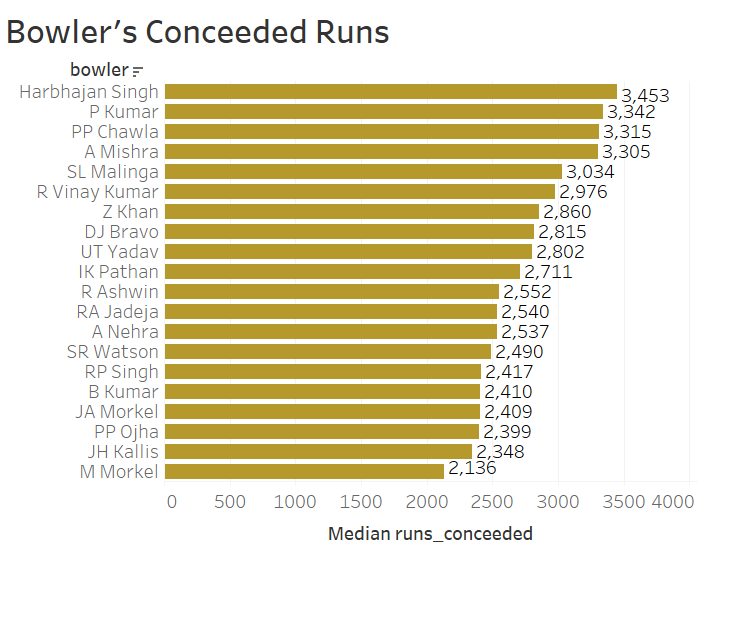

In [27]:
Image(r'C:\Users\yashv\Documents\py\Bowler Conceeded Runs.png',
height = 1500, width = 900)

# NUMBER OF WIDES/NO BALLS BOWLERS

In [24]:
a1.loc[a1['Wide/No_ball']=='Yes'].groupby('bowler')['Wide/No_ball'].count()

bowler
A Ashish Reddy        6
A Choudhary           7
A Kumble             17
A Mishra             64
A Mithun             24
A Nehra              65
A Singh              13
A Symonds            13
A Uniyal              2
A Zampa               4
AA Chavan             7
AA Jhunjhunwala       3
AA Kazi               1
AA Noffke             1
AB Agarkar           38
AB Dinda             73
AB McDonald           2
AC Thomas            12
AC Voges              2
AD Mascarenhas        3
AD Mathews           16
AD Russell           20
AF Milne              7
AG Murtaza            5
AJ Finch              1
AJ Tye                2
AL Menaria            3
AM Nayar              9
AM Salvi              6
AN Ahmed             18
                     ..
Swapnil Singh         1
T Natarajan           4
T Thushara            8
TA Boult             20
TG Southee           31
TL Suman              2
TM Dilshan            4
TP Sudhindra          4
TS Mills              3
UT Yadav             91
Umar Gul 

# XRTA RUNS CONCEEDED BY BOWLERS

In [29]:
xtraruns=a1.groupby('bowler')['extra_runs'].sum().sort_values(ascending=False)
xtraruns=xtraruns.reset_index()
xtraruns.rename(columns={'extra_runs':'xtras'},inplace=True)

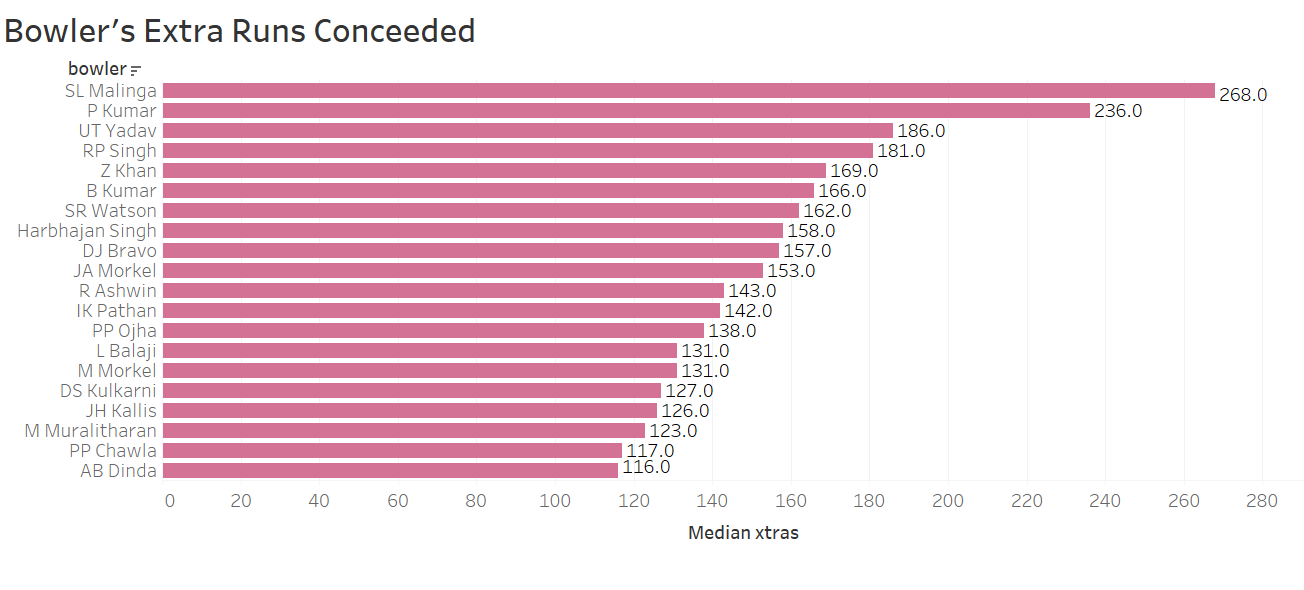

In [30]:
Image(r'C:\Users\yashv\Documents\py\Extra Runs Conceeded.png',
height = 1100, width = 800)

# NUMBER OF WICKETS TAKEN BY BOWLERS

In [32]:
a1['player_dismissed']= a1['player_dismissed'].replace(0,'no wicket')

In [33]:
wicketstaken = a1[a1['player_dismissed']!='no wicket'].groupby(['bowler','bowling_team'])['player_dismissed'].count()
wicketstaken=wicketstaken.sort_values(ascending=False)
wicketstaken=wicketstaken.reset_index()
wicketstaken.rename(columns={'player_dismissed':'Wickets_Taken'},inplace=True)

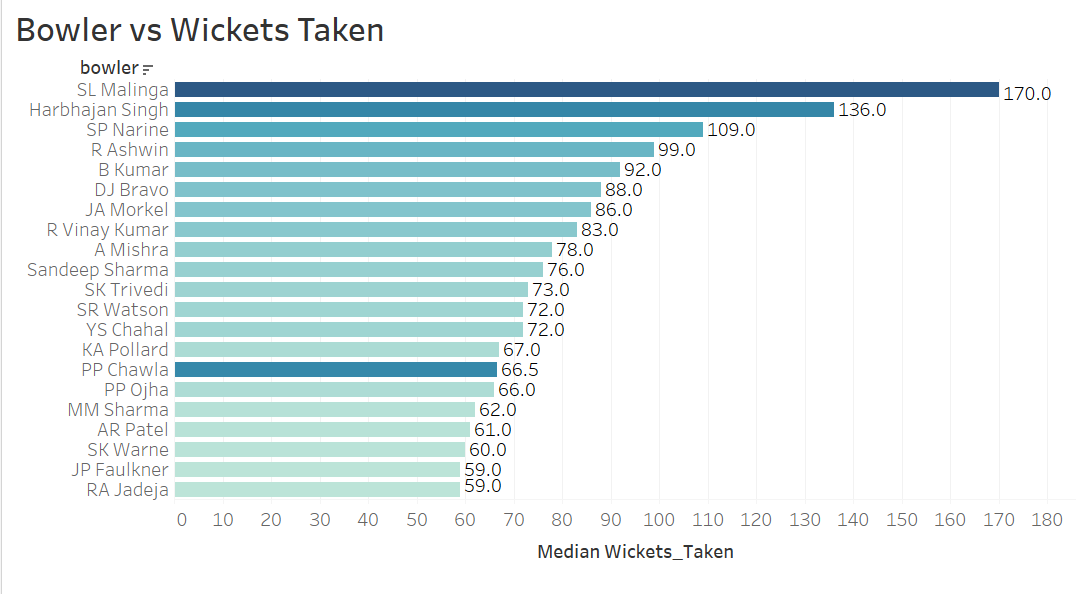

In [35]:
Image(r'C:\Users\yashv\Documents\py\Wicket Taken.png',
height = 800, width = 800)

# Rank Table

In [36]:
wicketstaken=wicketstaken.merge(ballsbowled,on='bowler',how='left')

In [37]:
wicketstaken=wicketstaken.merge(totalruns,on='bowler',how='left')

In [38]:
wicketstaken=wicketstaken.merge(xtraruns,on='bowler',how='left')


# CALCULATING COMBINED BOWLING RATE

In [39]:
r=3*wicketstaken['runs_conceeded']
w=wicketstaken['Wickets_Taken']
rwb=(wicketstaken['runs_conceeded']*wicketstaken['Wickets_Taken'])/wicketstaken['balls_bowled']
b=wicketstaken['balls_bowled']/6
wicketstaken['combined_bowling_rate']=r/(w+(rwb)+b)

In [40]:
wicketstaken.head(n=50)

,bowler,bowling_team,Wickets_Taken,balls_bowled,runs_conceeded,xtras,combined_bowling_rate
0,SL Malinga,Mumbai Indians,170,2694,3034,268,11.230727
1,Harbhajan Singh,Mumbai Indians,136,2989,3453,158,13.091468
2,SP Narine,Kolkata Knight Riders,109,1956,2085,86,11.348202
3,R Ashwin,Chennai Super Kings,99,2359,2552,143,12.775623
4,B Kumar,Sunrisers Hyderabad,92,2054,2410,166,13.332625
5,PP Chawla,Kings XI Punjab,89,2594,3315,117,15.659671
6,DJ Bravo,Chennai Super Kings,88,2110,2815,157,15.159688
7,JA Morkel,Chennai Super Kings,86,1807,2409,153,14.401651
8,R Vinay Kumar,Royal Challengers Bangalore,83,2161,2976,114,16.015232
9,A Mishra,Delhi Daredevils,78,2703,3305,114,15.892688


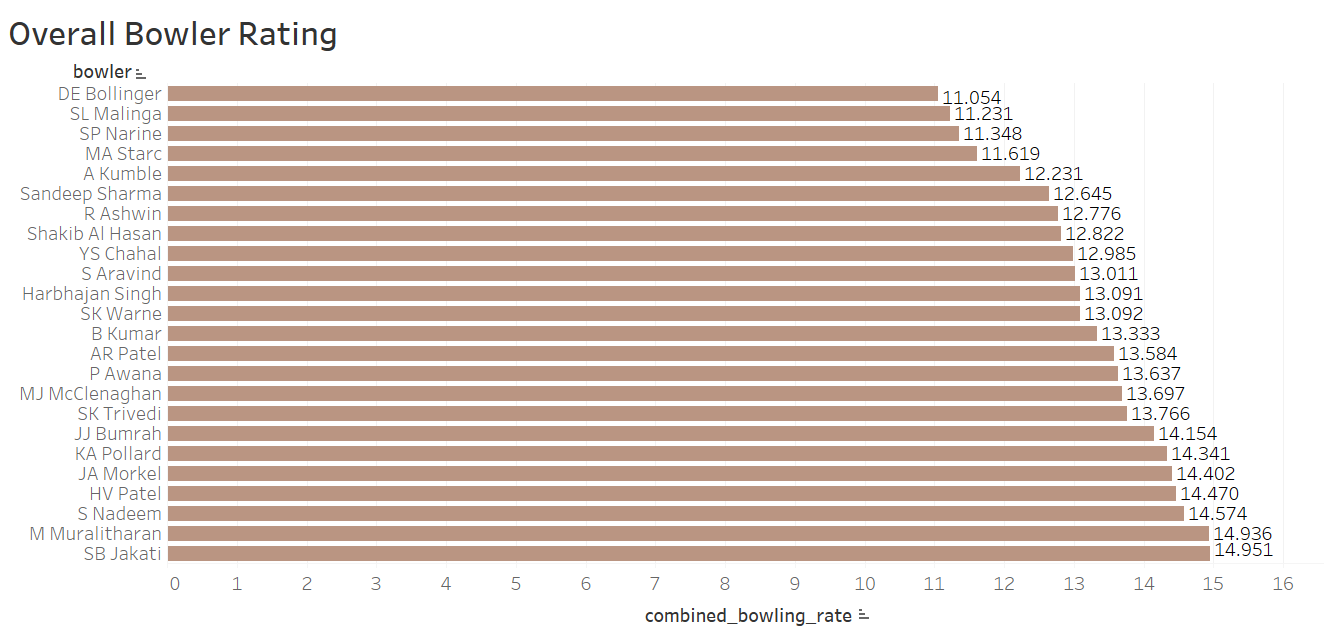

In [41]:
Image(r'C:\Users\yashv\Documents\py\Bowler Overall Rating.png',
height = 1100, width = 800)

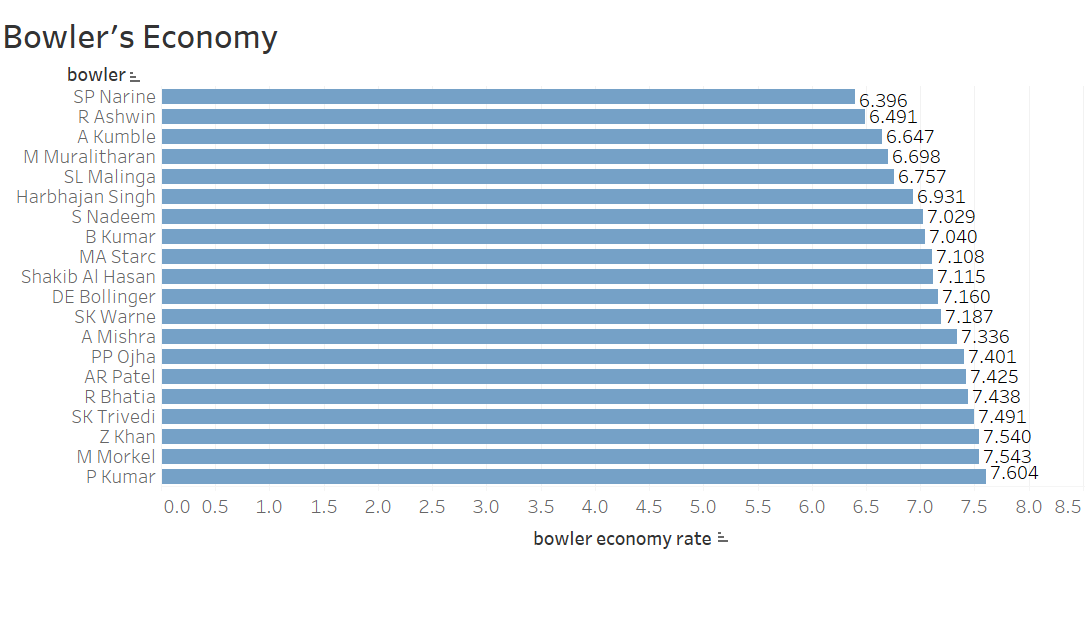

In [43]:
Image(r'C:\Users\yashv\Documents\py\Economy.png',
height = 1100, width = 800)

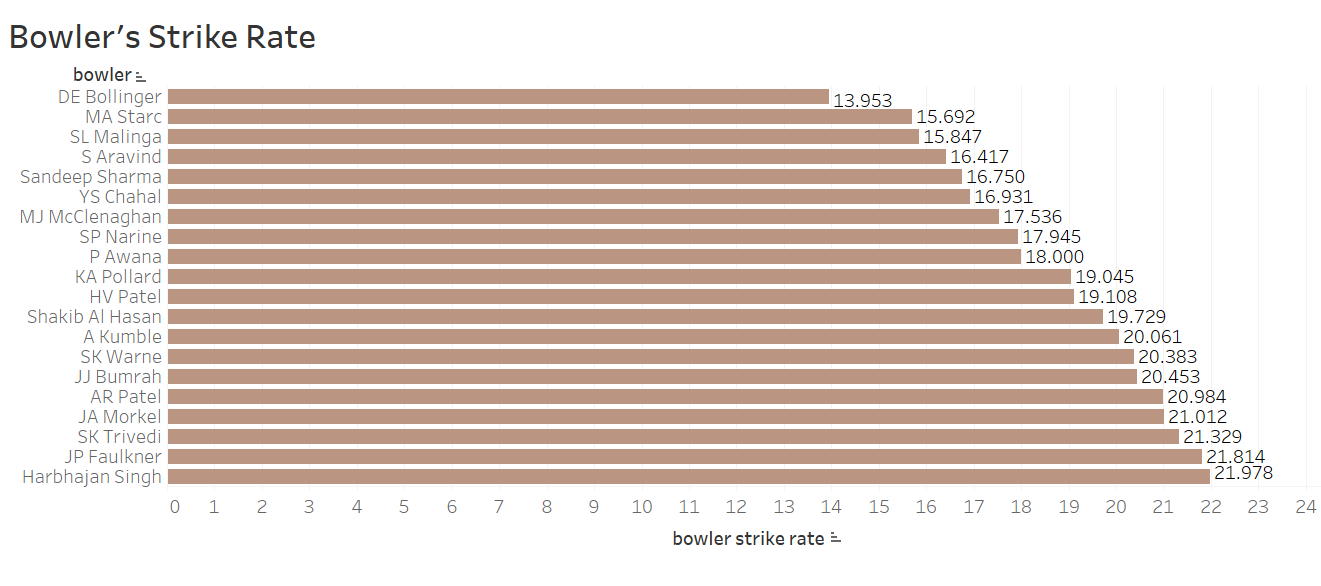

In [44]:
Image(r'C:\Users\yashv\Documents\py\Bowler Strike Rate.png',
height = 1100, width = 800)

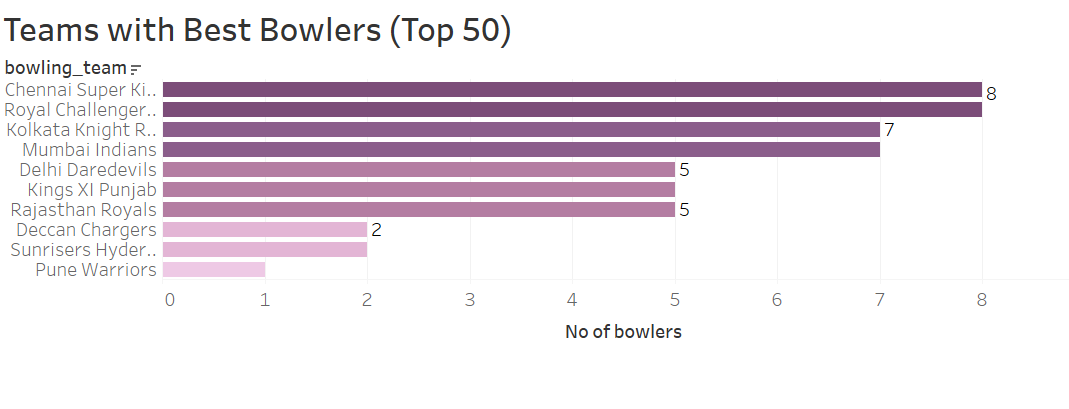

In [45]:
Image(r'C:\Users\yashv\Documents\py\Top teams.png',
height = 1100, width = 800)

In [46]:
wicketstaken.to_csv(r'C:\Users\yashv\Documents\py\pyfin.csv')